In [1]:
# # Installing packages
# !pip install watermark
# !pip install vaderSentiment
# !pip install imbalanced-learn

In [2]:
# Import of libraries
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train_dataset.csv', names=['polarity', 'reviewTitle', 'reviewText'])

In [4]:
# Viewing first 5 data
df.head()

,polarity,reviewTitle,reviewText
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [5]:
# Viewing 5 latest data
df.tail()

,polarity,reviewTitle,reviewText
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...
399999,1,"Comedy Scene, and Not Heard",This DVD will be a disappointment if you get i...


In [6]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   polarity     400000 non-null  int64 
 1   reviewTitle  399976 non-null  object
 2   reviewText   400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [7]:
# Type data
df.dtypes

polarity        int64
reviewTitle    object
reviewText     object
dtype: object

In [8]:
# Viewing rows and columns
df.shape

(400000, 3)

In [9]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
polarity        0
reviewTitle    24
reviewText      0
dtype: int64


In [10]:
# Remove columns that have any NaN value
df = df.dropna(axis=1)

# Check remaining columns after removal
print("Remaining columns after removing columns with NaN:")
print(df.isnull().sum())

Remaining columns after removing columns with NaN:
polarity      0
reviewText    0
dtype: int64


In [13]:
df.head()

,polarity,reviewText
0,2,My lovely Pat has one of the GREAT voices of h...
1,2,Despite the fact that I have only played a sma...
2,1,I bought this charger in Jul 2003 and it worke...
3,2,Check out Maha Energy's website. Their Powerex...
4,2,Reviewed quite a bit of the combo players and ...


# Text Preprocessing

In [14]:
%%time

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# ### Download the necessary resources from nltk (tokenizers and stopwords corpus)
# # Punkt tokenizer for word tokenization
# nltk.download('punkt')
 
# # Stopwords list in multiple languages
# nltk.download('stopwords')   

# Initialize the Porter stemmer and load English stopwords
stemmer = PorterStemmer()

# Create a set of English stopwords for efficient lookup
stop_words = set(stopwords.words('english'))  

# Function to clean the text by removing URLs, handles, and punctuation
def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove URLs (http, https, and www links)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove markdown-style links [text](link)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        # Remove handles (@username mentions)
        text = re.sub(r'@\w+', '', text)

        # Remove punctuation and special characters
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

# Function to tokenize the text into individual words
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# Function to remove stopwords from the tokenized text
def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

# Function to apply stemming to the tokens
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

### Apply the functions to the DataFrame
# Clean the text
df['Cleaned_Review'] = df['reviewText'].apply(clean_text)

# Tokenize the cleaned text
df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_text)

# Remove stopwords from the tokenized text
df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)

# Apply stemming to the tokenized words
df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)

# Display the first few rows of the DataFrame to visualize the dataset
df.head()

CPU times: total: 16min 31s
Wall time: 17min 7s


,polarity,reviewText,Cleaned_Review,Tokenized_Review,No_Stopwords_Review,Stemmed_Review
0,2,My lovely Pat has one of the GREAT voices of h...,my lovely pat has one of the great voices of h...,"[my, lovely, pat, has, one, of, the, great, vo...","[lovely, pat, one, great, voices, generation, ...","[my, love, pat, ha, one, of, the, great, voic,..."
1,2,Despite the fact that I have only played a sma...,despite the fact that i have only played a sma...,"[despite, the, fact, that, i, have, only, play...","[despite, fact, played, small, portion, game, ...","[despit, the, fact, that, i, have, onli, play,..."
2,1,I bought this charger in Jul 2003 and it worke...,i bought this charger in jul 2003 and it worke...,"[i, bought, this, charger, in, jul, 2003, and,...","[bought, charger, jul, 2003, worked, ok, desig...","[i, bought, thi, charger, in, jul, 2003, and, ..."
3,2,Check out Maha Energy's website. Their Powerex...,check out maha energys website their powerex m...,"[check, out, maha, energys, website, their, po...","[check, maha, energys, website, powerex, mhc20...","[check, out, maha, energi, websit, their, powe..."
4,2,Reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo players and ...,"[reviewed, quite, a, bit, of, the, combo, play...","[reviewed, quite, bit, combo, players, hesitan...","[review, quit, a, bit, of, the, combo, player,..."


# Sentiment Analysis with Vader

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer, which is part of the VADER sentiment analysis tool.
analyzer = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis to each review.
# The function takes in a 'review' (text) and returns the polarity scores, which include
# 'compound', 'positive', 'negative', and 'neutral' sentiment values.
def get_sentiment(review):
    return analyzer.polarity_scores(review)

# Apply the 'get_sentiment' function to each entry in the 'Cleaned_Review' column.
# Store the resulting sentiment scores (dictionary) in a new column 'vader_scores'.
df['vader_scores'] = df['Cleaned_Review'].apply(get_sentiment)

# Extract the 'compound' score from the 'vader_scores' dictionary for each review.
# The 'compound' score is a normalized score ranging from -1 (most negative) to +1 (most positive),
# summarizing the overall sentiment of the text.
df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Function to classify the sentiment based on the 'compound' score.
# Scores >= 0.05 are classified as 'Positive', <= -0.05 as 'Negative', and anything in between as 'Neutral'.
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the 'classify_sentiment' function to the 'compound' score to get the overall sentiment
# classification (Positive, Negative, or Neutral) for each review.
df['sentiment'] = df['compound'].apply(classify_sentiment)

# Display the first few rows of the DataFrame, showing the cleaned review text,
# the 'compound' sentiment score, and the classified 'sentiment'.
print(df[['Cleaned_Review', 'compound', 'sentiment']].head(10))

                                      Cleaned_Review  compound sentiment
0  my lovely pat has one of the great voices of h...    0.9264  Positive
1  despite the fact that i have only played a sma...    0.8867  Positive
2  i bought this charger in jul 2003 and it worke...    0.8402  Positive
3  check out maha energys website their powerex m...    0.4404  Positive
4  reviewed quite a bit of the combo players and ...    0.5599  Positive
5  i also began having the incorrect disc problem...   -0.3506  Negative
6  i love the style of this but after a couple ye...   -0.0638  Negative
7  i cannot scroll through a dvd menu that is set...   -0.4273  Negative
8  exotic tales of the orient from the 1930s dr s...   -0.5423  Negative
9  firstlyi enjoyed the format and tone of the bo...    0.9647  Positive


# Bar chart data analysis

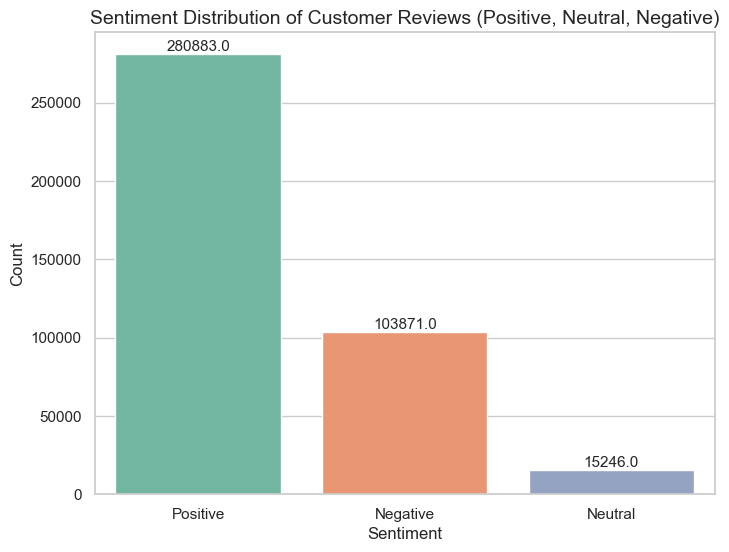

In [16]:
# Assuming df is already loaded and contains the 'sentiment' column
plt.figure(figsize=(8, 6))

# Count plot with a specific color palette
sns.countplot(data=df, x='sentiment', palette='Set2')

# Add title and axis labels with adjusted font sizes
plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=11)

# Display the plot
plt.show()

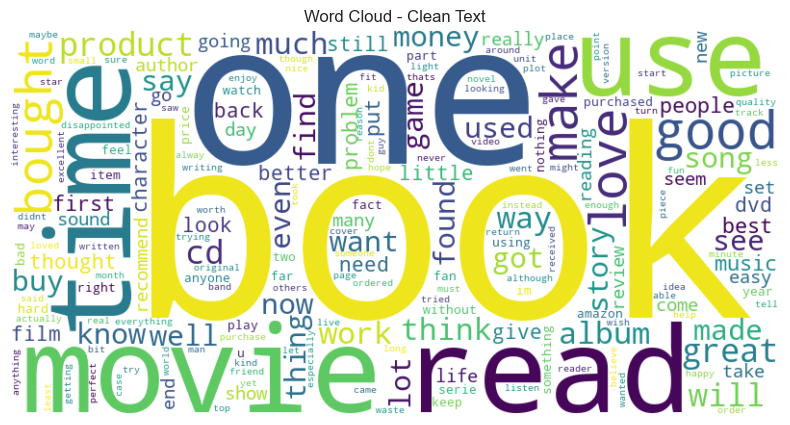

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, 
                      background_color='white').generate(' '.join(df['Cleaned_Review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Clean Text")
plt.show()

In [18]:
# Displaying the first few rows of the dataframe to verify
df.head()

,polarity,reviewText,Cleaned_Review,Tokenized_Review,No_Stopwords_Review,Stemmed_Review,vader_scores,compound,sentiment
0,2,My lovely Pat has one of the GREAT voices of h...,my lovely pat has one of the great voices of h...,"[my, lovely, pat, has, one, of, the, great, vo...","[lovely, pat, one, great, voices, generation, ...","[my, love, pat, ha, one, of, the, great, voic,...","{'neg': 0.074, 'neu': 0.744, 'pos': 0.182, 'co...",0.9264,Positive
1,2,Despite the fact that I have only played a sma...,despite the fact that i have only played a sma...,"[despite, the, fact, that, i, have, only, play...","[despite, fact, played, small, portion, game, ...","[despit, the, fact, that, i, have, onli, play,...","{'neg': 0.046, 'neu': 0.809, 'pos': 0.145, 'co...",0.8867,Positive
2,1,I bought this charger in Jul 2003 and it worke...,i bought this charger in jul 2003 and it worke...,"[i, bought, this, charger, in, jul, 2003, and,...","[bought, charger, jul, 2003, worked, ok, desig...","[i, bought, thi, charger, in, jul, 2003, and, ...","{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.8402,Positive
3,2,Check out Maha Energy's website. Their Powerex...,check out maha energys website their powerex m...,"[check, out, maha, energys, website, their, po...","[check, maha, energys, website, powerex, mhc20...","[check, out, maha, energi, websit, their, powe...","{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.4404,Positive
4,2,Reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo players and ...,"[reviewed, quite, a, bit, of, the, combo, play...","[reviewed, quite, bit, combo, players, hesitan...","[review, quit, a, bit, of, the, combo, player,...","{'neg': 0.11, 'neu': 0.758, 'pos': 0.131, 'com...",0.5599,Positive


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features

# Training and testing division
X = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])
y = df['sentiment']

tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [20]:
import pickle
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf_vectorizer, file)

In [21]:
# Visualizing data x
X.shape

(400000, 5000)

In [22]:
# Viewing y data
y.shape

(400000,)

In [23]:
# Import the LabelEncoder class from sklearn, which is used to convert categorical labels to numeric values
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to the target variable 'y', which contains categorical sentiment labels
# The fit_transform() method encodes the labels (e.g., 'Positive', 'Neutral', 'Negative') into numeric values (e.g., 0, 1, 2)
y = le.fit_transform(y)

# The 'le' object now contains the mapping between the original labels and the numeric values
le

LabelEncoder()

In [25]:
print(le.classes_)

['Negative' 'Neutral' 'Positive']


In [26]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [24]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (320000, 5000)
Viewing rows and columns given y train (320000,)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

Model: RandomForestClassifier
Training Accuracy: 0.999940625
Testing Accuracy: 0.785825

Confusion matrix for Model: RandomForestClassifier 

 [[ 8509     9 12129]
 [  497    67  2545]
 [ 1926    28 54290]]


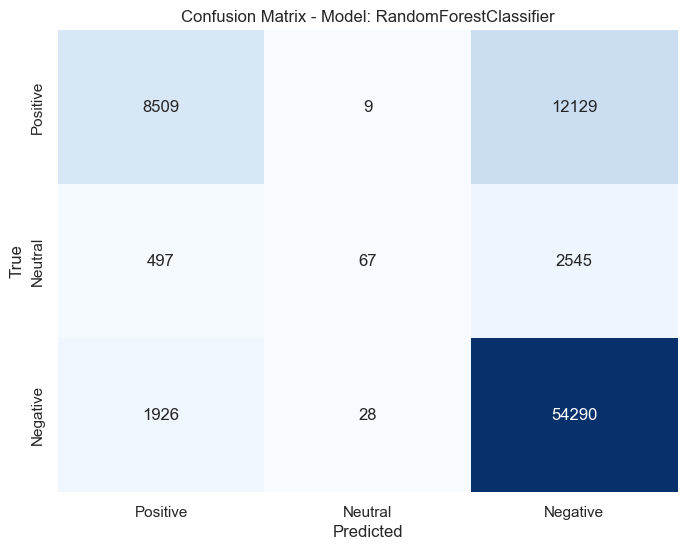

In [26]:
model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy of the model on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Model: {type(model).__name__}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print()

# Define your sentiment labels
labels = ['Positive', 
          'Neutral', 
          'Negative']

# Calculate the confusion matrix for the training and testing predictions
cm = confusion_matrix(y_test, y_test_pred)
    
print(f'Confusion matrix for Model: {type(model).__name__} \n\n', cm)
# Plot the confusion matrix with annotations for three classes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - Model: {type(model).__name__}")
plt.show()

In [27]:
# from sklearn.ensemble import GradientBoostingClassifier

# model = GradientBoostingClassifier(random_state=42)

# model.fit(X_train, y_train)

# train_accuracy = accuracy_score(y_train, model.predict(X_train))
# test_accuracy = accuracy_score(y_test, model.predict(X_test))

# print(f"Model: {type(model).__name__}")
# print(f"Training Accuracy: {train_accuracy:.4f}")
# print(f"Testing Accuracy: {test_accuracy:.4f}")

In [28]:
# Define sentiment labels (assuming 3-class classification)
sentiment_labels = ['Positive', 'Neutral', 'Negative']

# Generate classification report with sentiment labels
report = classification_report(y_test, y_test_pred, target_names=sentiment_labels)
print()
print("Classification Report:")
print("=======================================================")
print(report)
print("=======================================================")


Classification Report:
              precision    recall  f1-score   support

    Positive       0.78      0.41      0.54     20647
     Neutral       0.64      0.02      0.04      3109
    Negative       0.79      0.97      0.87     56244

    accuracy                           0.79     80000
   macro avg       0.74      0.47      0.48     80000
weighted avg       0.78      0.79      0.75     80000



In [29]:
import pickle
# Saving the model as a .pkl file
model_filename = f"model_{type(model).__name__}.pkl"  # Defining the filename for saving
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)  # Serializing the model object
    print(f"Model {type(model).__name__} saved as {model_filename}")  # Confirming that the model has been saved

Model RandomForestClassifier saved as model_RandomForestClassifier.pkl


------------------------------------------------Ends here------------------------------------------------------------------